In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
#Read the data
cars = pd.read_csv("/Users/chira/Downloads/Toyoto_Corrola.csv")
cars.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
#check for missing values
cars.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [7]:
cars.corr()
y = cars.loc[:,'Price']
x = cars.loc[:,cars.columns!='Price']
x

Id                                              Model  Age_08_04  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors         23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors         23   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors         24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors         26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors         30   
...    ...                                                ...        ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors         69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...         72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...         71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...         70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors         76   

         KM   HP  Doors  Cylinders  Gears  Weight  
0     46986   90      3          4      5    1165  
1     72937   90      3          4      5    1165  
2     41711   90      3          4      5    1165  
3     48000   90      3          4      5    1165  
4     38500   90      3          4      5    1170  
...     ...  ...    ...        ...    ...     ...  
1431  20544   86      3          4      5    1025  
1432  19000   86      3          4      5    1015  
1433  17016   86      3          4      5    1015  
1434  16916   86      3          4      5    1015  
1435      1  110      5          4      5    1114  

[1436 rows x 9 columns]

# Scatterplot between variables along with histograms

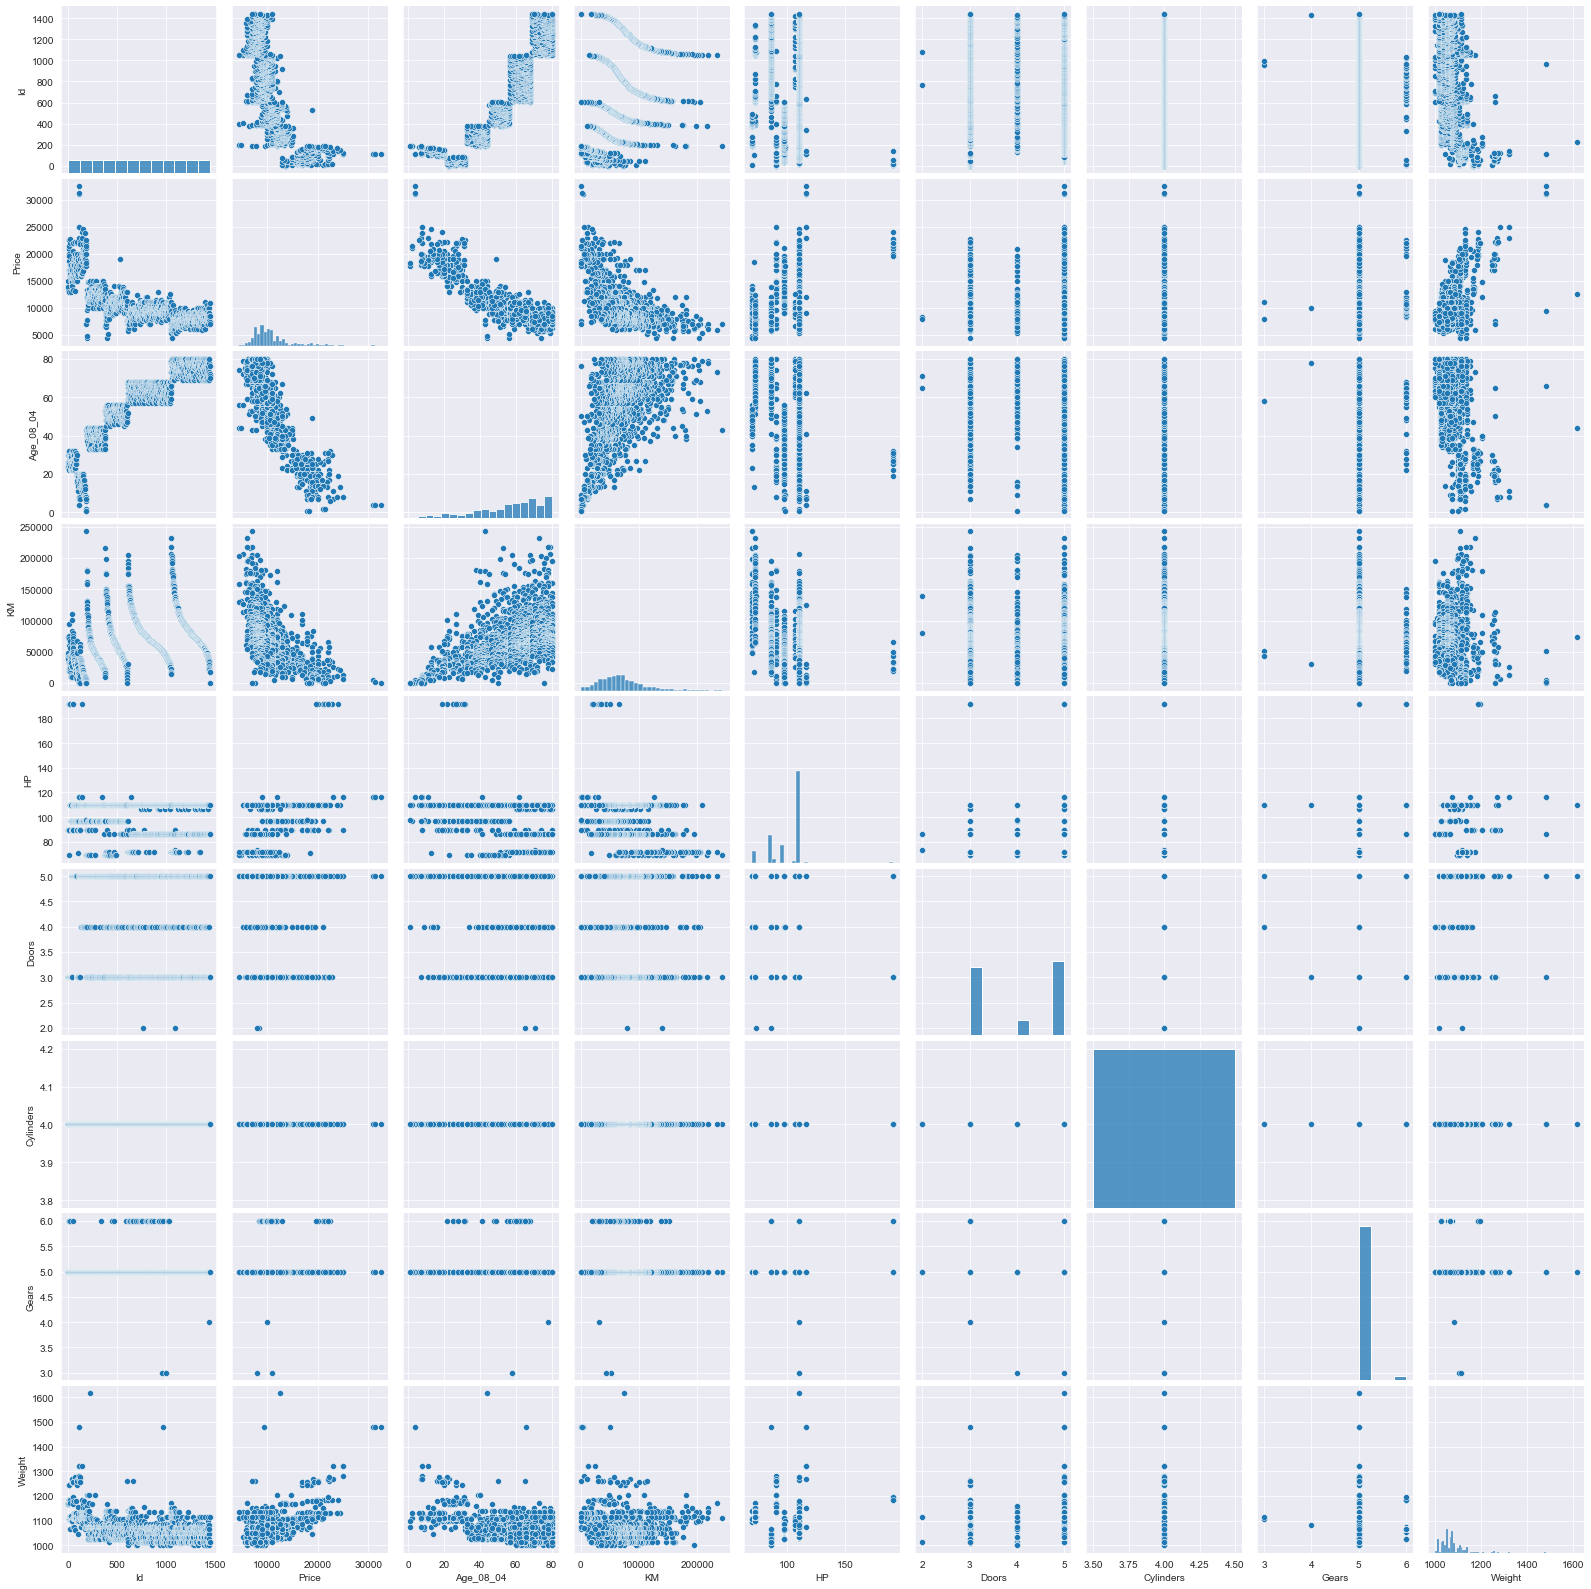

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [10]:
#Build model
import statsmodels.formula.api as smf 

#y='MPG'
model = smf.ols('MPG~HP+SP+WT+VOL',data=cars).fit()

In [11]:
#Coefficients
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
WT            0.400574
VOL          -0.336051
dtype: float64

In [113]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Cylinders    -5.323309
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Cylinders     1.181900e-07
Weight        7.856458e-96
dtype: float64


In [114]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Simple Linear Regression Models

In [115]:
ml_v=smf.ols('Price~Doors',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [41]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [42]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [43]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables         VIF
0        Hp   19.926589
1        WT  639.533818
2       VOL  638.806084
3        SP   20.007639

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

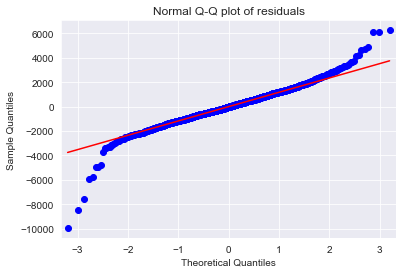

In [116]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [122]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

## Residual Plot for Homoscedasticity

In [123]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

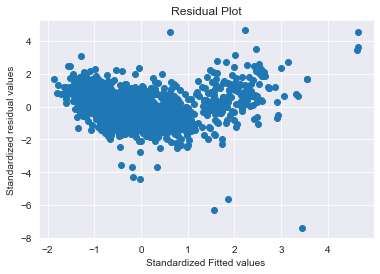

In [124]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

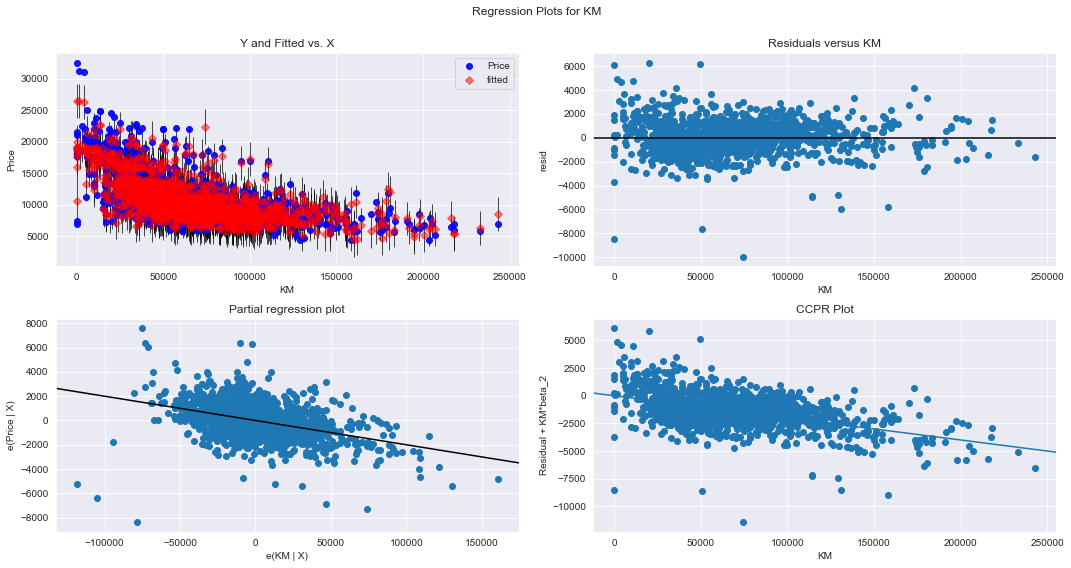

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

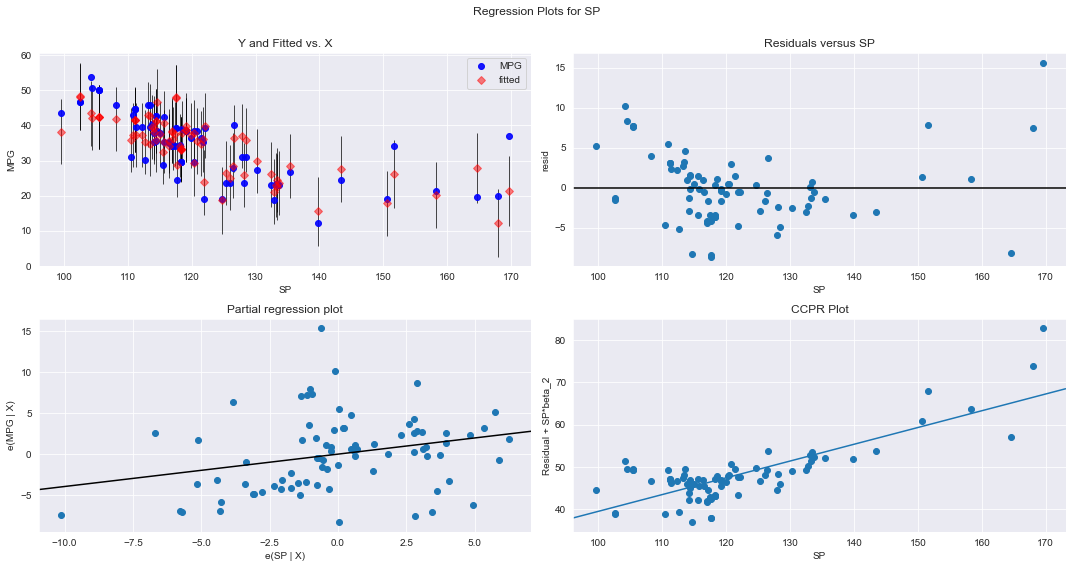

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

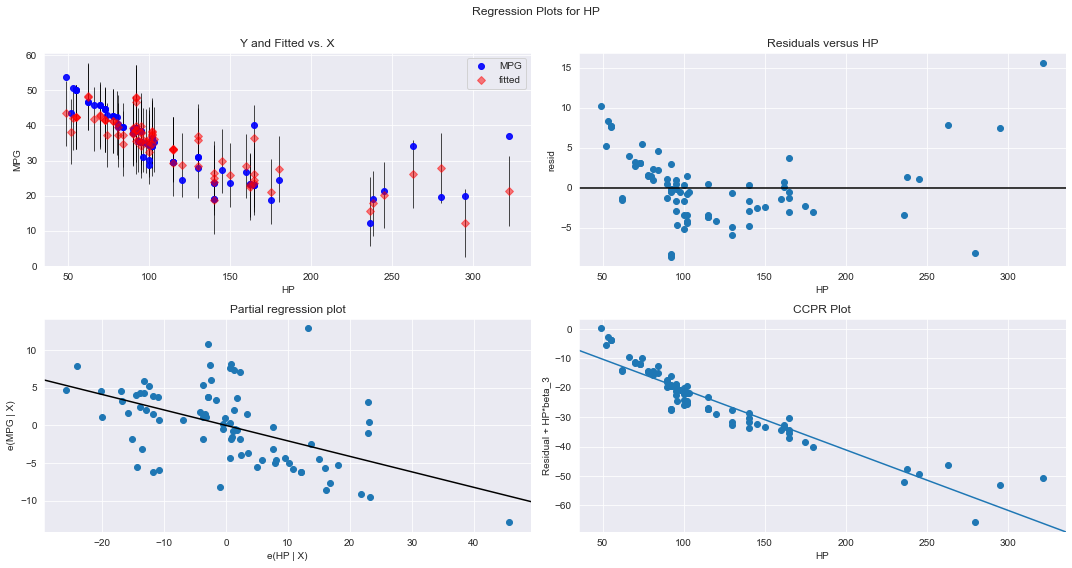

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

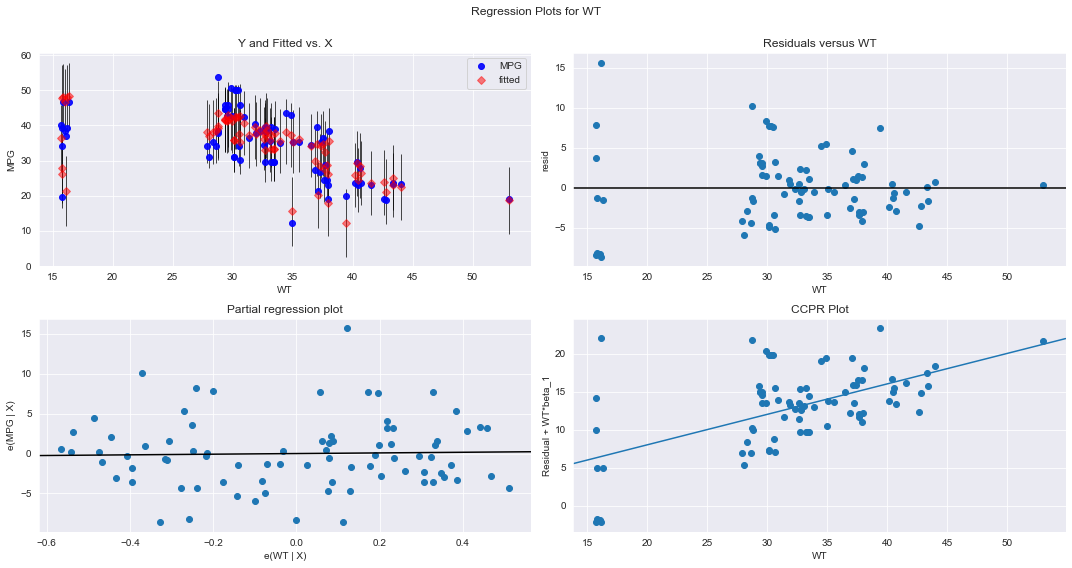

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [126]:
model_influence = model.get_influence()
(c,p)= model_influence.cooks_distance

In [127]:
c

array([4.24724192e-03, 2.47586025e-03, 3.06355853e-03, ...,
       3.95661636e-06, 7.09835015e-04, 1.05319874e-02])

In [65]:
p

array([0.99749559, 0.999611  , 0.99986003, 0.99998609, 0.99955511,
       0.99999503, 0.9998141 , 0.99999897, 0.99999675, 0.99999995,
       0.9999985 , 0.99403955, 0.99999999, 0.99999838, 0.99999376,
       0.9999937 , 0.99999986, 0.99565009, 0.99999997, 0.99999997,
       1.        , 0.999967  , 1.        , 0.99999999, 0.99999973,
       0.99767993, 0.99996892, 1.        , 0.9994181 , 1.        ,
       0.99993697, 0.9999999 , 0.99999999, 0.99999986, 0.99999865,
       1.        , 0.99999999, 0.99999529, 0.99995016, 0.99997662,
       1.        , 1.        , 0.99999581, 0.99999583, 1.        ,
       0.99999998, 1.        , 1.        , 0.99994456, 0.99999357,
       0.99999849, 0.99999452, 1.        , 0.99995725, 0.99999993,
       1.        , 0.99992953, 0.99999327, 0.99994468, 0.99999732,
       0.99999879, 0.99995818, 0.99999979, 0.99999741, 0.9999988 ,
       0.99974271, 0.99999212, 1.        , 0.99999997, 0.99999956,
       0.94273321, 0.99999996, 1.        , 1.        , 0.99981

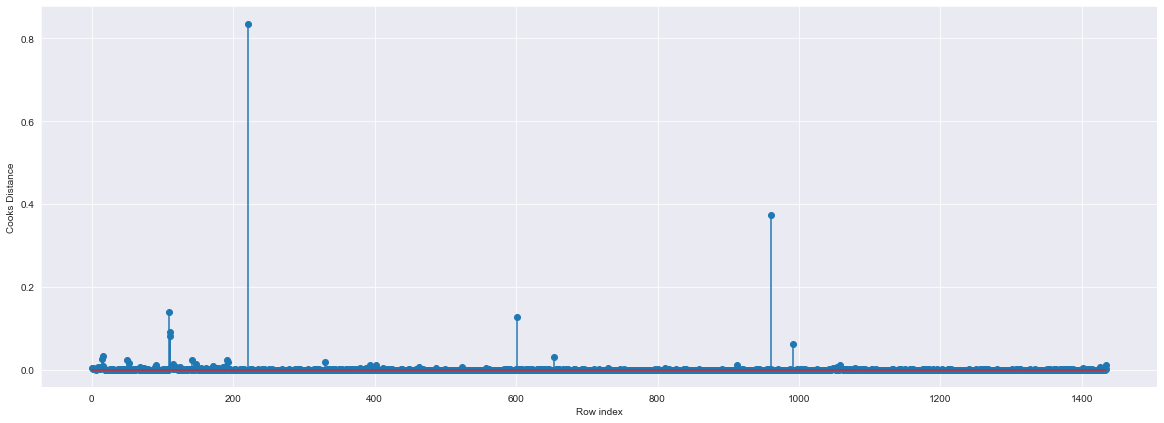

In [128]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [129]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508853785)

## High Influence points

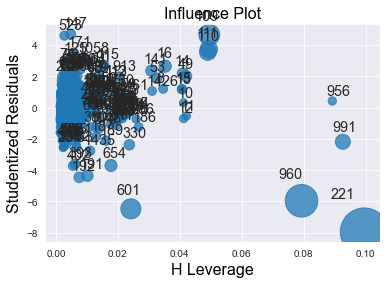

In [130]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [133]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [134]:
leverage_cutoff

0.02298050139275766

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [74]:
cars[cars.index.isin([70, 76])]

HP        MPG  VOL          SP         WT
70  280  19.678507   50  164.598513  15.823060
76  322  36.900000   50  169.598513  16.132947

In [75]:
#See the differences in HP and other variable values
cars.head()

HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149

# Improving the model

In [135]:
#Load the data
cars_new = pd.read_csv("/Users/chira/Downloads/Toyoto_Corrola.csv")

In [136]:
cars_new

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1431         69  20544   86      3          4      5    1025  
1432         72  19000   86      3          4      5    1015  
1433         71  17016   86      3          4      5    1015  
1434         70  16916   86      3          4      5    1015  
1435         76      1  110      5          4      5    1114  

[1436 rows x 10 columns]

In [137]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[221,960,601]],axis=0).reset_index()

In [138]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [139]:
car1

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1428  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1429  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1430  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1431  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1432  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1428         69  20544   86      3          4      5    1025  
1429         72  19000   86      3          4      5    1015  
1430         71  17016   86      3          4      5    1015  
1431         70  16916   86      3          4      5    1015  
1432         76      1  110      5          4      5    1114  

[1433 rows x 10 columns]

# Build Model

In [140]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Cylinders+Weight',data = car1).fit()

In [141]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8775378736529914, 24562.458847450926)

In [82]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [83]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.8160034320495304, 446.1884323575032, 455.66622376737126)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [142]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

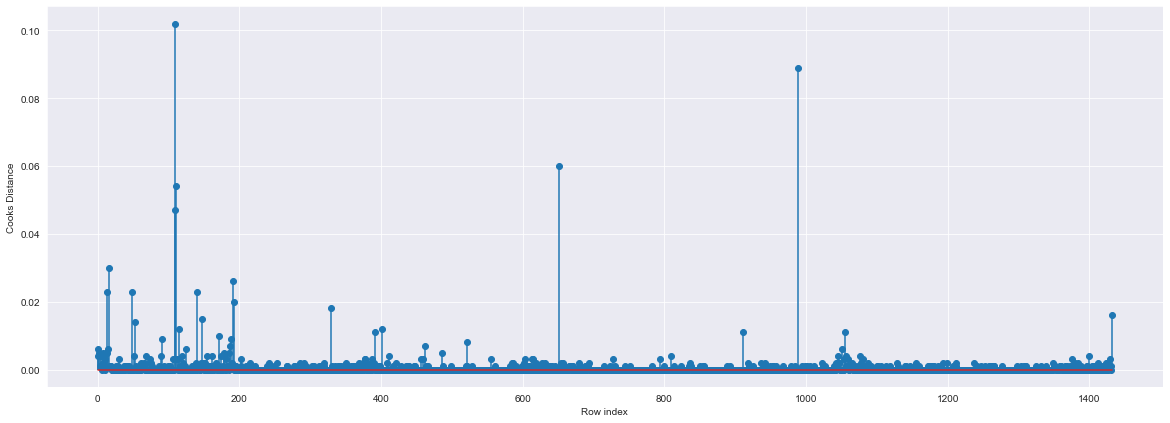

In [143]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [144]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(109, 0.10205872804784388)

In [145]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[109]],axis=0)

In [146]:
car2

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1428  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1429  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1430  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1431  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1432  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1428         69  20544   86      3          4      5    1025  
1429         72  19000   86      3          4      5    1015  
1430         71  17016   86      3          4      5    1015  
1431         70  16916   86      3          4      5    1015  
1432         76      1  110      5          4      5    1114  

[1432 rows x 10 columns]

In [147]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [148]:
car4=car3.drop(['index'],axis=1)

In [149]:
car4

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1427  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1428  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1429  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1430  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1431  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1427         69  20544   86      3          4      5    1025  
1428         72  19000   86      3          4      5    1015  
1429         71  17016   86      3          4      5    1015  
1430         70  16916   86      3          4      5    1015  
1431         76      1  110      5          4      5    1114  

[1432 rows x 10 columns]

In [151]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Cylinders+Weight',data = car4).fit()

In [152]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

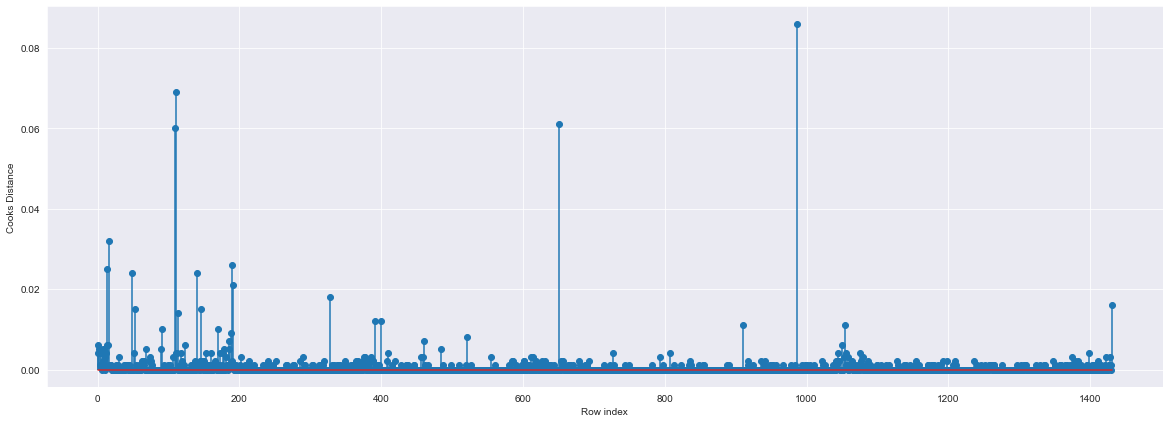

In [153]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [154]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(987, 0.08637355497462168)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [155]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Cylinders+Weight',data = car4).fit()

In [156]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8755059597579958, 24533.435928501447)

## Predicting for new data

In [97]:
#New data for prediction
new_data=pd.DataFrame({'HP':41,"VOL":100,"SP":132,"WT":65},index=[1])

In [98]:
final_ml_V.predict(new_data)

1    58.096512
dtype: float64

In [99]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [100]:
pred_y = final_ml_V.predict(cars_new)

In [101]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64